# Autoproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

we'll start with loading the data and doing some preflight checks on the given dataset.: 

In [1]:
#import modules: 
#   ops: 
import os
import sys
import json
#   data
import pandas as pd 
import numpy as np
from scipy.stats import *
#   visualisation:
import matplotlib.pyplot  as plt
#custom utilities: 
parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)
from utils.preflight import *
from utils.cars import *
from utils.config import *
from utils.stats import * 
from utils.plotstyle import *
initialize_custom_style()




In [2]:
#read the settings file: 
settings_filename = 'config_cars.json'
this_dir = os.getcwd()
settings_path = os.path.join(this_dir, '../config', settings_filename)
with open(settings_path) as settings_file:
    settings = json.load(settings_file)
    datafile = os.path.join(this_dir, '../', settings['data_directory'], settings['datamode'], settings['sourcefile'])

brand = settings['brand']

In [3]:
#read data: 
data = load_data(datafile)

In [4]:
#preflightcheck: what data do we have?: 
preflightchecks(data)

,Column Name,Data Type,NaN Count,Unique Count,suitable PK,Max,Min,Range,Avg,Median,Mode,Standard Dev,Variance,Skewedness,Kurtosis,Quant_25,Quant_50,Quant_75,Out of bound lows,Out of bound highs
0,manufacturer,object,0,30,False,NaN,NaN,NaN,NaN,NaN,Ford,NaN,NaN,NaN,NaN,None,None,None,None,None
1,model,object,0,12187,False,NaN,NaN,NaN,NaN,NaN,Fusion SE,NaN,NaN,NaN,NaN,None,None,None,None,None
2,year,int64,0,100,False,2.024000e+03,1915.0,109.0,2017.791398,2019.0,2020,5.110532e+00,2.611754e+01,-4.914221,47.346791,"0.25 2016.0 Name: year, dtype: float64","0.5 2019.0 Name: year, dtype: float64","0.75 2021.0 Name: year, dtype: float64",None,None
3,mileage,float64,506,158751,False,1.119067e+06,0.0,1119067.0,55781.692701,45596.0,0.0,4.355788e+04,1.897289e+09,1.473302,5.575576,"0.25 23287.0 Name: mileage, dtype: float64","0.5 45596.0 Name: mileage, dtype: float64","0.75 78365.0 Name: mileage, dtype: float64",None,None
4,engine,object,15050,6903,False,NaN,NaN,NaN,NaN,NaN,2.0L I4 16V GDI DOHC Turbo,NaN,NaN,NaN,NaN,None,None,None,None,None
5,transmission,object,9904,1313,False,NaN,NaN,NaN,NaN,NaN,6-Speed Automatic,NaN,NaN,NaN,NaN,None,None,None,None,None
6,drivetrain,object,21562,33,False,NaN,NaN,NaN,NaN,NaN,Front-wheel Drive,NaN,NaN,NaN,NaN,None,None,None,None,None
7,fuel_type,object,22927,36,False,NaN,NaN,NaN,NaN,NaN,Gasoline,NaN,NaN,NaN,NaN,None,None,None,None,None
8,mpg,object,142071,865,False,NaN,NaN,NaN,NaN,NaN,19-26,NaN,NaN,NaN,NaN,None,None,None,None,None
9,exterior_color,object,8859,7681,False,NaN,NaN,NaN,NaN,NaN,Black,NaN,NaN,NaN,NaN,None,None,None,None,None


In [5]:
column = 'price'
#prepare the dataset for all the questions: 
brand_data = extract_brand(data, brand)
brand_data_extended = brand_data.copy()  # Create a copy of the DataFrame
brand_data_extended.loc[:, 'pricegroup'] = brand_data[column].apply(lambda x: get_pricegroup(x))

used_brand_median_price = get_median_of_column(brand_data_extended, column)
used_brand_mean_price = get_mean_of_column(brand_data_extended, column)
used_brand_min_price = get_min_of_column(brand_data_extended, column)
used_brand_max_price = get_max_of_column(brand_data_extended, column)
optimal_bin_amount = square_root_rule_bins(brand_data_extended)
ecdf_result = ecdf(brand_data_extended[column])

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

In [6]:
#let's look at the entire dataset to anwer Q1: 
#   year: 
data.fuel_type.unique()


array(['Gasoline', 'Hybrid', nan, 'Premium', 'Electric',
       'Gasoline/Mild Electric Hybrid', 'Diesel', 'E85 Flex Fuel',
       'Flexible Fuel', 'Gasoline Fuel', 'Plug-In Hybrid',
       'Premium (Required)', 'Regular Unleaded', 'Unspecified', 'Unknown',
       'Compressed Natural Gas', 'Other', 'Natural Gas', 'Gaseous',
       'Bi-Fuel', 'Flex Fuel Capability', 'Diesel Fuel',
       'Premium Unleaded', 'Biodiesel', 'Bio Diesel',
       'Hydrogen Fuel Cell', 'Gas', 'PHEV', 'Hybrid Fuel', 'Automatic',
       'E85 Fl', 'Electric Fuel System', 'G', 'B', 'Gas/Electric Hybrid',
       'Flex Fuel', 'Plug-In Electric/Gas'], dtype=object)

In [7]:
data[data['fuel_type'].isnull()]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
17,Acura,NSX T,1995,320000.0,NaN,5-Speed M/T,Rear-wheel Drive,NaN,NaN,Red,Black,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,75500.0
135,Acura,ILX,2019,50358.0,NaN,8 Speed Dual-Clutch,NaN,NaN,NaN,Performance Red Pearl,Ebony,0.0,1.0,1.0,Radley Acura,4.0,4.7,26.0,125.0,22694.0
163,Acura,ILX,2020,24234.0,NaN,8 Speed Dual-Clutch,NaN,NaN,NaN,Modern Steel Metallic,Ebony,0.0,1.0,0.0,Mile High Acura,NaN,4.6,17.0,NaN,26900.0
209,Acura,ILX Premium Package,2020,18378.0,2.4L,NaN,Front-wheel Drive,NaN,0-34,Platinum White Pearl,Ebony,NaN,NaN,NaN,Hertrich Acura,4.6,4.6,17.0,NaN,26498.0
228,Acura,ILX,2020,27897.0,NaN,8 Speed Dual-Clutch,NaN,NaN,NaN,Majestic Black Pearl,Ebony,0.0,1.0,0.0,Open Road Acura of East Brunswick,NaN,4.6,17.0,788.0,24000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760345,Volvo,S60 Inscription T5 Platinum,2018,71200.0,NaN,8-Speed A/T,All-wheel Drive,NaN,NaN,Beige,Beige,NaN,NaN,NaN,NaN,NaN,4.9,11.0,NaN,21900.0
760848,Volvo,S60 B5 FWD Momentum,2022,22282.0,NaN,NaN,NaN,NaN,NaN,Crystal White,NaN,NaN,NaN,NaN,Lehman Volvo Cars of York,NaN,4.2,2.0,NaN,35500.0
761069,Volvo,S60 T5 Premier,2016,64638.0,2.5L I5 20V Turbocharged,Automatic,All-wheel Drive,NaN,0-0,Black Stone,Off-Black,1.0,0.0,1.0,Germain Toyota,4.4,4.8,23.0,933.0,17661.0
761558,Volvo,S60,2022,22565.0,NaN,NaN,All-wheel Drive,NaN,NaN,Bright Silver,Blond,0.0,1.0,0.0,Lehman Volvo Cars of Mechanicsburg,NaN,4.2,2.0,375.0,35975.0


In [8]:
ratings = data.seller_rating.unique().sort()
print(ratings)

None


**Year**: `Preflight` check shows us it's **Numerical discrete data** (we only know the year, not the month and day). Pandas uses the datatype: int64, there are a hundred given years spread over a range of 109 years.

**Fuel type**: `Preflight` check shows us that Pandas categorizes the data as an Object, so we're expecting stringdata. Looking at the unique values we can see it is **Categorical nominal data**. We should be cautious with a single nan-reference in there. This might indicate the original data wasn't properly converted into a CSV file. We also see some synonyms in here: 
- E85 Fl and E85 Flex Fuel are probably the same
- Hybrid is a problematic term, it technically covers every drivetrain that mix two or more energysources. An engine such as the LDT 465 could technically qualify as a hybrid. Just as any car that had after market LPG conversions.
- Bio diesel and Biodiesel are the same, Pandas just doesn't realize. 
- ...
==> when working with fuel type as a parameter, I'd advice caution and maybe check back on the people that made the actual datasource!

**seller_rating**": `Preflight` check shows us that Pandas categorizes the data as a float with 41 different values between 5.0 and 1.0. There's also the possibility of finding NaN in this column. Given the high interval rate I'd say this is **numerical continuous data**

### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

In [9]:
median_car_based_on_price = brand_data_extended.loc[(brand_data_extended['price'] == used_brand_median_price)]
median_car_based_on_price

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,pricegroup
755471,Volvo,XC40 R-Design,2020,35989.0,I-4 cyl,Automatic with Geartronic,AWD,Gasoline,NaN,Onyx Black Metallic,...,0.0,1.0,1.0,Borton Volvo Cars,4.0,4.9,50.0,NaN,36673.0,37.0


### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
![alt text](image.png)
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

In [10]:
low_x_lim = 0  #always set the xlimit to zero for the price

sqrt_bins_result = square_root_rule_bins(brand_data_extended)
#we always want the graph to start at 0, so as min pass zero (low_x_lim).
bin_amount, bin_1k_multiplicator, bin_min, bin_max = calculate_bins_for_even_k(low_x_lim, used_brand_max_price, sqrt_bins_result)


Text(0, 0.5, 'ECDF')

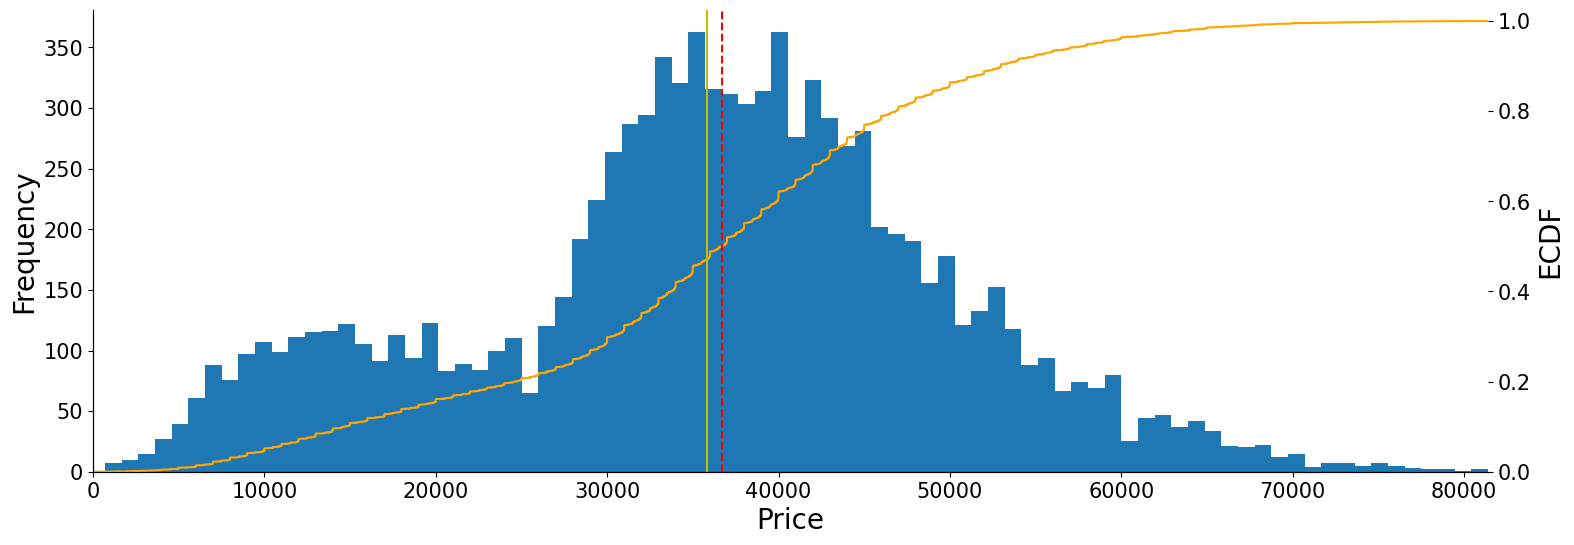

In [11]:
# so my ecdf curve is crushed, split it to a second axis: 
## see solution presented here: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
# To Compute the ECDF 


# minprice = np.floor(cars_data_raw[cars_data_raw['manufacturer'] == brand]['price'].min())
# maxprice = np.ceil(cars_data_raw[cars_data_raw['manufacturer'] == brand]['price'].max())
fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.hist(
    brand_data_extended['price'], 
    bins=bin_amount
    )

ecdf_result.cdf.plot(ax2, color='orange')
plt.axvline(
    x=int(used_brand_median_price), 
    color='r', 
    linestyle='dashed', 
    label='median price'
)
plt.axvline(
    x=int(used_brand_mean_price), 
    color='y', 
    linestyle='solid', 
    label='average price'
)
#standard the 0 marker floats somewhere. Unless a car is really shit, no on is going
#to give you money to buy it, so let's improve this:
#No point to reserve room in the tail for prices that don't exist, use the max val!
plt.xlim([low_x_lim, used_brand_max_price])
ax2.set_ylim([0,1.025])
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('ECDF')

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

I'd be cautious using this graph: as demonstrated in Q1 fuel types aren't properly processed (e.g. Bio Diesel) and categories are ambigious (e.g. Hybrid). One way to aproach this problem is using stacked bar charts or grouped bar charts. For the remainder of this question we'll apply filters applied on the fueltype to match what's given in the example graph and apply these fuel restrictions to the subslice of the data containing only Volvo cars.

In [12]:
#asign the fuels you want to study as a KEY to this dict, 
#as a value use a color code suitable for matplotlib.
fuel_colors = {
    'Electric': 'b',
    'Hybrid': 'g',
    'Gasoline': 'orange'
}

fuels_of_interest = list(fuel_colors.keys())
fuels_querystring = []
for fuel in fuels_of_interest:
    fuels_querystring.append(f"fuel_type == '{fuel}'")

#for some reason 'or' has to be lowercase, don't change it!
fuels_querystring = ' or '.join(fuels_querystring)



Text(0, 0.5, 'Frequency')

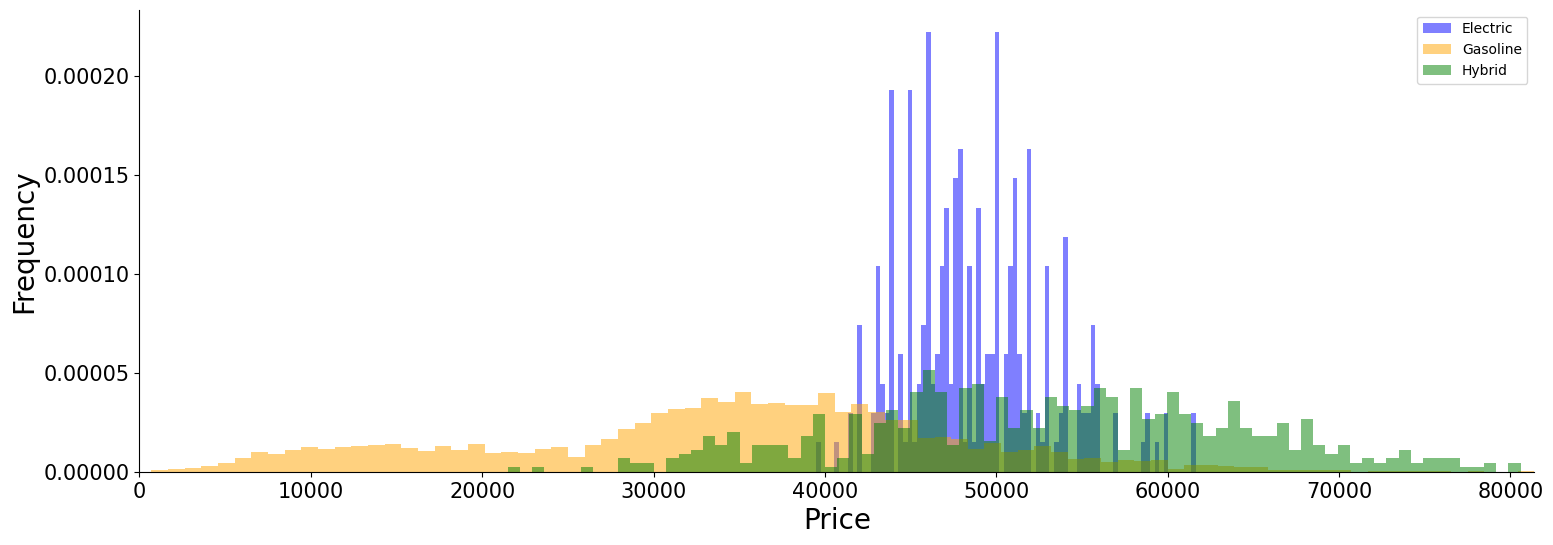

In [13]:
#subsclice the dataset to show the fuel types we're interested in.
#use a groupby so you can iterate over them easily. 
fuelgroups = brand_data_extended.query(fuels_querystring).groupby('fuel_type')

fig, ax = plt.subplots()

fueltypelabels = []
for label, dataframe in fuelgroups: 
    fueltypelabels.append(label)
    ##matplotlibcode: 
    ax.hist(
        dataframe.price, 
        bins=bin_amount,
        density = True,
        color = fuel_colors[label], 
        alpha = 0.5
        )

#standard the 0 marker floats somewhere. Unless a car is really shit, no on is going
#to give you money to buy it, so let's improve this:
#No point to reserve room in the tail for prices that don't exist, use the max val!
plt.legend(fueltypelabels)
plt.xlim([low_x_lim, used_brand_max_price])
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

The initial plot is not that clear, a chart focussing on the relative amount of each fuel type per bin would be better to visualize the interesting part (i.e. lower priced cars are clearly Gasoline, Electric cars make up medium- to higher priced cars. Hybrid powertrains are becoming more dominant in the higher price categories). Being a density chart, the meaning is a bit hard to convey, let's make a stacked bar chart with the relative distribution per fuel type and overlay that with a line representing the absolute number of units/

In [14]:
#make a new dataframe based on demarcations.
#have it count: 
#   all cars within the price bracket
#   all cars within the price bracket per fuel type. 
bracket_range = bin_1k_multiplicator*1000
low = 0  #inclusive
high = 0 #exclusive
relative_brand_fueltype = []
for bracket in range(bin_amount): 
    low = bracket * bracket_range
    high = low + bracket_range
    cars_in_bracket = (brand_data_extended
                        .query(
                            f"(price >= {low} and price < {high}) and ({fuels_querystring})")
                      ).groupby('fuel_type')
    rowdata = {'minprice' : low,
               'maxprice' : high, 
               'total' : 0
               }
    for fuel in fuels_of_interest: 
        #reset counts to zero!
        rowdata[fuel] = 0
    total = 0
    for label, subset in cars_in_bracket:
        amount = subset.shape[0]
        total +=amount
        rowdata[label]= amount
    rowdata['total'] = total
    relative_brand_fueltype.append(rowdata)
df_relative_brand_fueltype = pd.DataFrame(relative_brand_fueltype)
#convert absolute numbers to relative!
for fuel in fuels_of_interest: 
    relname = fuel+'_relative'
    df_relative_brand_fueltype[relname] = df_relative_brand_fueltype[fuel]/df_relative_brand_fueltype['total']



In [15]:
df_relative_brand_fueltype.fillna(0)

,minprice,maxprice,total,Electric,Hybrid,Gasoline,Electric_relative,Hybrid_relative,Gasoline_relative
0,0,1000,1,0,0,1,0.0,0.000000,1.000000
1,1000,2000,10,0,0,10,0.0,0.000000,1.000000
2,2000,3000,12,0,0,12,0.0,0.000000,1.000000
3,3000,4000,24,0,0,24,0.0,0.000000,1.000000
4,4000,5000,43,0,0,43,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
78,78000,79000,3,0,2,1,0.0,0.666667,0.333333
79,79000,80000,1,0,1,0,0.0,1.000000,0.000000
80,80000,81000,1,0,1,0,0.0,1.000000,0.000000
81,81000,82000,1,0,0,1,0.0,0.000000,1.000000


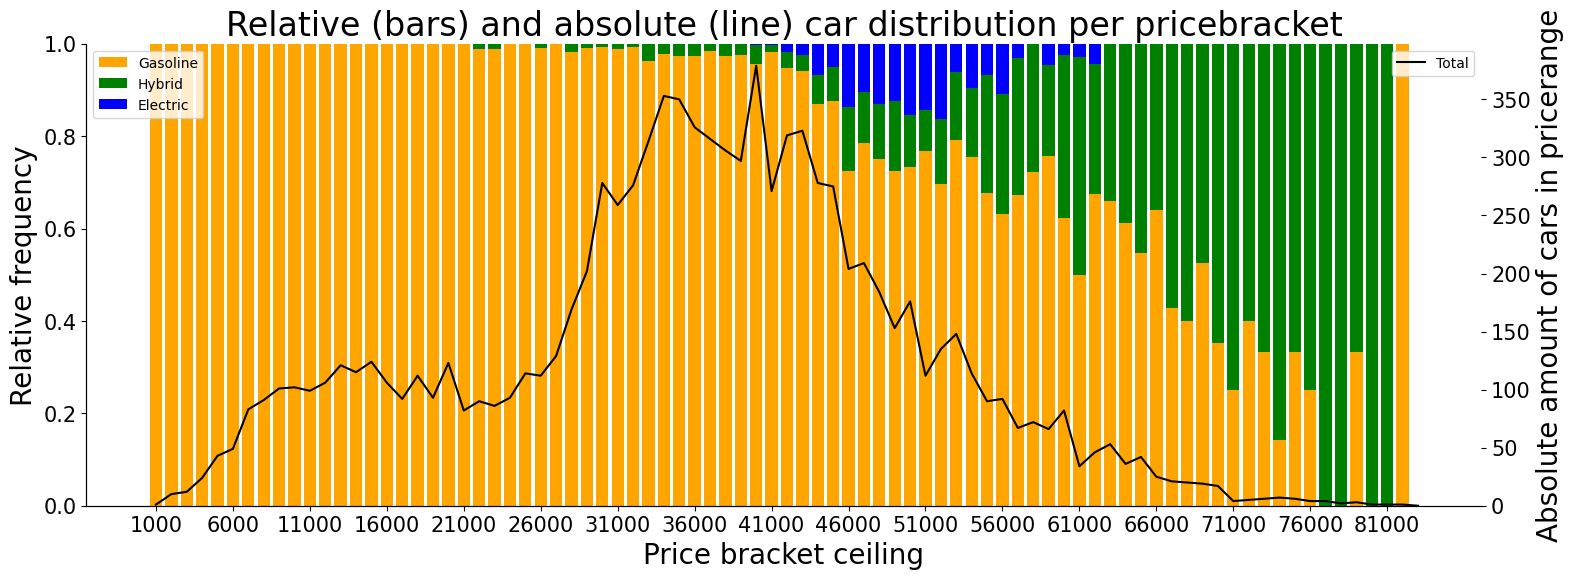

In [16]:
maxprices = df_relative_brand_fueltype.maxprice
gasoline = df_relative_brand_fueltype.Gasoline_relative
hybrid = df_relative_brand_fueltype.Hybrid_relative
electric = df_relative_brand_fueltype.Electric_relative

fig, ax = plt.subplots(figsize=(18, 6))
index = np.arange(len(maxprices))
gas = 'Gasoline'
elec = 'Electric'
hyb = 'Hybrid'

plt.bar(index, gasoline, color=fuel_colors[gas], label=gas)
plt.bar(index, hybrid, bottom=gasoline, color=fuel_colors[hyb], label=hyb)
plt.bar(index, electric, bottom=np.array(gasoline) + np.array(hybrid), color=fuel_colors[elec], label=elec)

plt.xticks(index[::5], maxprices[::5])
plt.xlabel('Price bracket ceiling')
plt.ylabel('Relative frequency')

#second axis for total amount of cars per pricebracket
ax2 = ax.twinx()
ax2.plot(df_relative_brand_fueltype.total, color='black', label='Total')
ax2.set_ylabel('Absolute amount of cars in pricerange')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')
ax.legend(loc='upper left')
ax2.set_ylim(0, df_relative_brand_fueltype.total.max()*1.05)

# Show plot
plt.title('Relative (bars) and absolute (line) car distribution per pricebracket')
plt.show()


Voila, this is much clearer, we see the relative proportion per price bracket by using the primary Y-axis, in the case of Volvo's the price bracket range is per 1000; where the exclusive bracket ceiling is being use on de the X-axis. 

Hybrid cars clearly dominate the higher price range, whereas electric cars seem to be more stuck in the middle- to high pricegroups. 

In the higher price ranges the relative proportion makes it easier to see the used powertrain for low-volume price brackets. 

Finally we can put the relative dominance of Hybrid and electric powertrains into perspective by looking at the linechart which shows the absolute amount of cars on the secondary Y-axis.

In [17]:
#BUG? is the most expensive volvo really a Gasoline car? 
brand_data_extended.query(f"price == {used_brand_max_price}")
#no bug; it really is like that. 


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,pricegroup
752218,Volvo,XC90 Recharge Plug-In Hybrid Ultimate Dark 7-S...,2023,6089.0,I-4 cyl,Automatic with Geartronic,All-wheel Drive,Gasoline,NaN,Platinum Gray Metallic,...,0.0,1.0,0.0,Culver City Volvo Cars,4.4,NaN,0.0,100.0,81400.0,82.0


### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

Q: 5A: De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens. 

A: No; Spread is very easy to see on a boxplot, it's the distance between the smallest and largest value. From the given graph we can easily see that the distance between the minimum and maximum value for petrol cars is greater than the distance for electric cars. 

Q: 5B: Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

A: We cannot tell from looking at this graph alone. Imagine the following situation, it's the year 2057 and Skynet has taken over the world, everyone is happily cruising in their electric car, in total there are close to a billion of these electric cars on the road. At the same time, petrol cars have become shunned, only a handfull of people still drive them, estimates are close to somewhere south of 200 cars. Some people who want to keep skynet out of their lives, are willing to pay a lot of money for these old vehicles. We put all these cars in a pot, and take a random car out of it, the chance that it is an electric car is much higher than that is a petrol car. Boxplots show spread in your data, but they fail to visualize sheer volume. (see graph below)



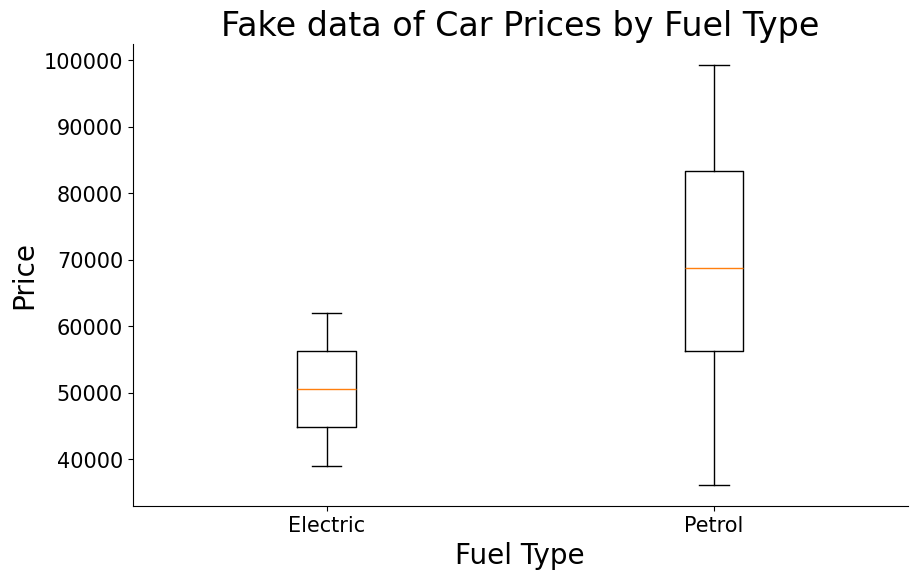

In [18]:
#proof for 5B: 
# Generate data for electric cars
electric_prices = np.random.uniform(39000, 62000, 1000000)
electric_fueltype = ['Electric'] * 1000000

# Generate data for petrol cars which can be worth a lot, super rare and great against skynet.
petrol_prices = np.random.uniform(35000, 100000, 200)
petrol_fueltype = ['Petrol'] * 200

prices = np.concatenate([electric_prices, petrol_prices])
fueltype = np.concatenate([electric_fueltype, petrol_fueltype])
car_data = pd.DataFrame({
    'Price': prices,
    'FuelType': fueltype
})

plt.figure(figsize=(10, 6))

electric_prices = car_data[car_data['FuelType'] == 'Electric']['Price']
petrol_prices = car_data[car_data['FuelType'] == 'Petrol']['Price']
plt.boxplot([electric_prices, petrol_prices], labels=['Electric', 'Petrol'])

plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Fake data of Car Prices by Fuel Type')

plt.show()

Q: 5C: Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

A:
The median is above the 50k mark, we can even see that part of the Q1 box is above the 50k-line, so yes; using the provided graph it is safe to assume that an electric car is more likely to cost over 50.000 euros.

### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

We start with a scatterplot, our data is massively compressed because of one record. The scatter shows a trend, but it's not clear at all

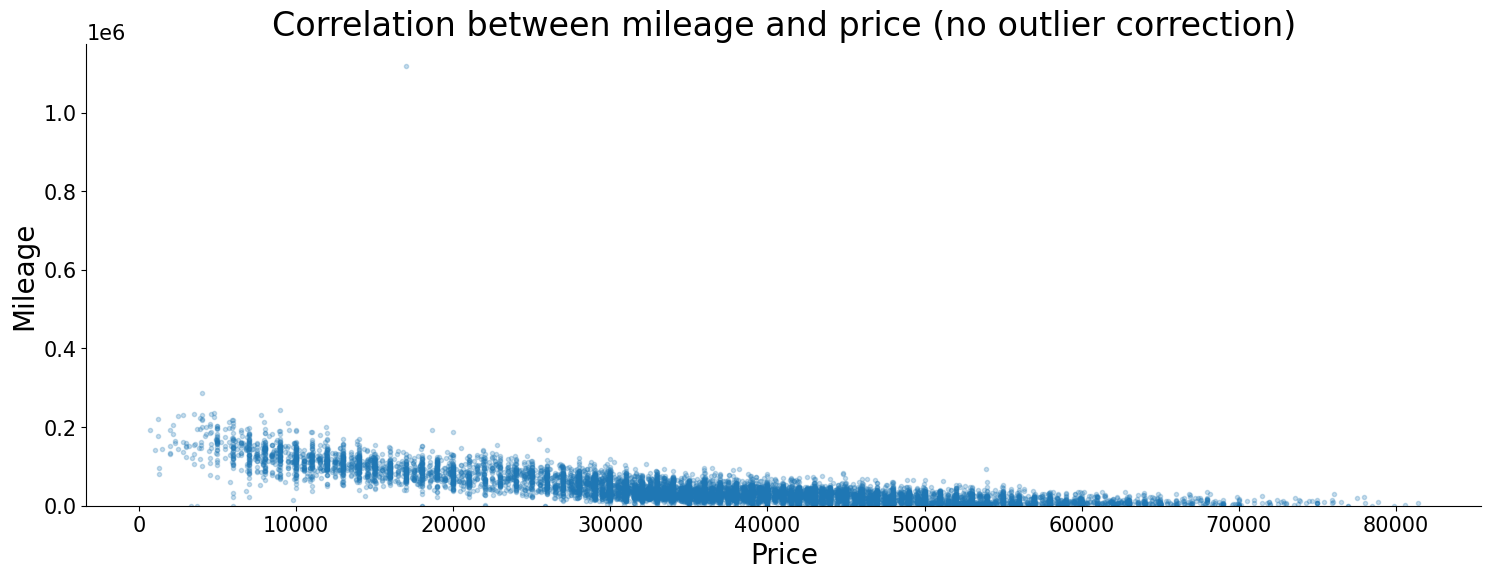

In [28]:
plt.figure()
plt.scatter(x = brand_data_extended.price, 
            y = brand_data_extended.mileage, 
            marker='.', 
            alpha = 0.25
            )

plt.xlabel('Price')
plt.ylabel('Mileage')
plt.ylim(0)
plt.title('Correlation between mileage and price (no outlier correction)')
plt.show()


Let's adress this issue by grouping our data into pricegroups of 1K, then take the median mileage of all records for that group.  To do something about the compression issue we calculate our outliers, but we deviate from the standard 1.5 factor by passing that as an argument to `outlier_remover`. The result is used to limit the vertical axis of the graph

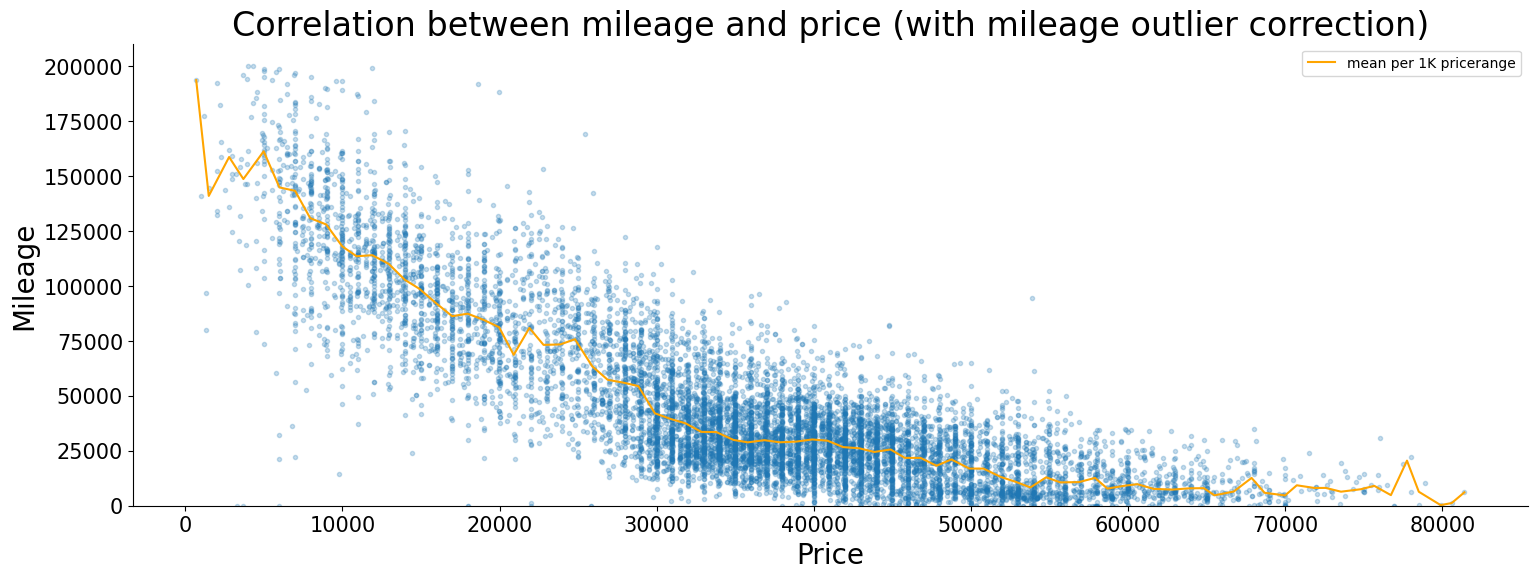

In [29]:
#we consider less data to be outliers by increasing the treshold_factor.
#we remove the outliers, but we deviate from the standard 1.5 iqd and we only remove the top outliers.
#the chosen factor is 3.5, and to keep lower outliers we pass False as a final argument.
brand_data_without_outliers = outlier_remover(brand_data_extended, 'mileage', 3.5, True, False)
#the line for the median data is based on the data without outliers.
median_frame = brand_data_without_outliers.groupby('pricegroup').median('mileage').reset_index()

plt.figure()
plt.scatter(x = brand_data_without_outliers.price, 
            y = brand_data_without_outliers.mileage, 
            marker='.', 
            alpha = 0.25
            )
plt.plot(median_frame.price, 
         median_frame.mileage,
         color='orange',
         label='mean per 1K pricerange'
            )
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.ylim(0)
plt.legend()
plt.title('Correlation between mileage and price (with mileage outlier correction)')
plt.show()



### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

We'll use the confidence interval for this:

In [30]:
electric_used_volvos = brand_data_extended.query('fuel_type == "Electric"')
mean_electric_price_of_brand = electric_used_volvos.price.mean()

In [31]:
iters = 10**6
bootstrapped_results = bootstrap(electric_used_volvos.price, iters)


In [35]:
confidence_lowerbound = []
confidence_upperbound = []
confidence_levels = []
for confidence_level in range(0, 101):
    confidence_level = confidence_level/100
    alpha = 1 - confidence_level
    bounds = get_bounds_for_ci(bootstrapped_results, alpha)
    confidence_lowerbound.append(bounds[0])
    confidence_upperbound.append(bounds[1])
    confidence_levels.append(confidence_level)

    

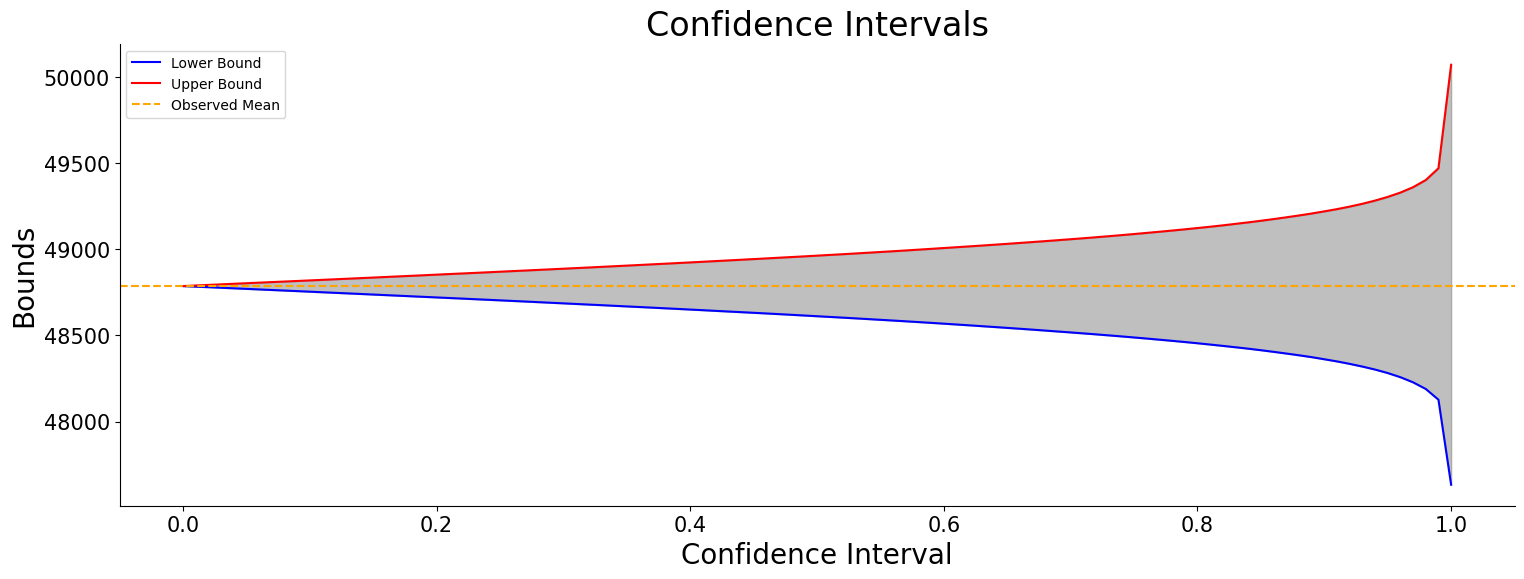

In [36]:
fig, ax = plt.subplots()
# Plot the confidence levels and their corresponding bounds
ax.plot(confidence_levels, confidence_lowerbound, label='Lower Bound', color='blue')
ax.plot(confidence_levels, confidence_upperbound, label='Upper Bound', color='red')

# Fill the area between the lower and upper bounds
ax.fill_between(confidence_levels, confidence_lowerbound, confidence_upperbound, color='gray', alpha=0.5)

# Add labels and title
ax.set_xlabel('Confidence Interval')
ax.set_ylabel('Bounds')
ax.set_title('Confidence Intervals')

ax.axhline(electric_used_volvos.price.mean(), color='orange', linestyle='--', label='Observed Mean')       ##actual mean in this population
ax.legend()


# Display the plot
plt.show()

When we use the observed mean rather then the mean given in the assignment you can be quite confident that the mean is representative for the population. If however you want to stick to the asigned mean of 48000 (green line) then the sample dataset seems to be an edgecase.

In [37]:
intersection = find_intersect(confidence_lowerbound, confidence_upperbound, confidence_levels, mean_electric_price_of_brand)
if intersection:
    print(f"We need a confidence interval of {intersection*100}% to have the asigned mean of {mean_electric_price_of_brand} intersect with the data.")
else:
    print(f"the given mean of {mean_electric_price_of_brand} did not intersect with the bootstrapped data.")

We need a confidence interval of 1.0% to have the asigned mean of 48788.391304347824 intersect with the data.
